In [1]:
from tensorflow import keras
import tensorflow as tf

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from skimage.io import imread, imshow
import cv2
import plotly.offline as py
py.init_notebook_mode(connected=True)

In [4]:
import os
print(os.listdir("../neural computing and deep learning/train/train"))

['type1', 'type2', 'type3']


In [5]:
import glob
from sklearn.model_selection import train_test_split
from collections import Counter
from concurrent import futures
import threading
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import datetime

In [6]:
base = os.path.join('../neural computing and deep learning/train/train')
type1 = os.path.join(base,'type1')
type2 = os.path.join(base,'type2')
type3 = os.path.join(base,'type3')

type1 = glob.glob(type1+'/*.jpg')
type2 = glob.glob(type2+'/*.jpg')
type3 = glob.glob(type3+'/*.jpg')

len(type1),len(type2),len(type3)

(250, 781, 450)

In [7]:
base1 = os.path.join('../neural computing and deep learning/test/test')

test = glob.glob(base1+'/*.jpg')
len(test)

512

In [8]:
np.random.seed(42)

df = pd.DataFrame({
    'filepath': type1 + type2 + type3,
    'category': ['type1'] * len(type1) + ['type2'] * len(type2) + ['type3'] * len(type3)
}).sample(frac=1, random_state=42).reset_index(drop=True)

df.head()

,filepath,category
0,../neural computing and deep learning/train/tr...,type1
1,../neural computing and deep learning/train/tr...,type2
2,../neural computing and deep learning/train/tr...,type2
3,../neural computing and deep learning/train/tr...,type2
4,../neural computing and deep learning/train/tr...,type3


In [9]:
df1 = pd.DataFrame({
    'image_name': test,
#     'category': ['type1'] * len(type1) + ['type2'] * len(type2) + ['type3'] * len(type3)
}).sample(frac=1, random_state=42).reset_index(drop=True)
df1.head()

,image_name
0,../neural computing and deep learning/test/tes...
1,../neural computing and deep learning/test/tes...
2,../neural computing and deep learning/test/tes...
3,../neural computing and deep learning/test/tes...
4,../neural computing and deep learning/test/tes...


In [10]:
len(df)
train_test_split

<function sklearn.model_selection._split.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)>

In [11]:
train_files, test_files, train_labels, test_labels = train_test_split(df['filepath'].values,
                                                                      df['category'].values, 
                                                                      test_size=0.2, random_state=42)

train_files, val_files, train_labels, val_labels = train_test_split(train_files,
                                                                    train_labels, 
                                                                    test_size=0.2, random_state=42)

print(train_files.shape, val_files.shape)
print('Train:', Counter(train_labels), '\nVal:', Counter(val_labels), '\nTest:',Counter(test_labels))

(947,) (237,)
Train: Counter({'type2': 511, 'type3': 276, 'type1': 160}) 
Val: Counter({'type2': 120, 'type3': 78, 'type1': 39}) 
Test: Counter({'type2': 150, 'type3': 96, 'type1': 51})


In [12]:
len(test_files)

297

In [13]:
len(test_labels)

297

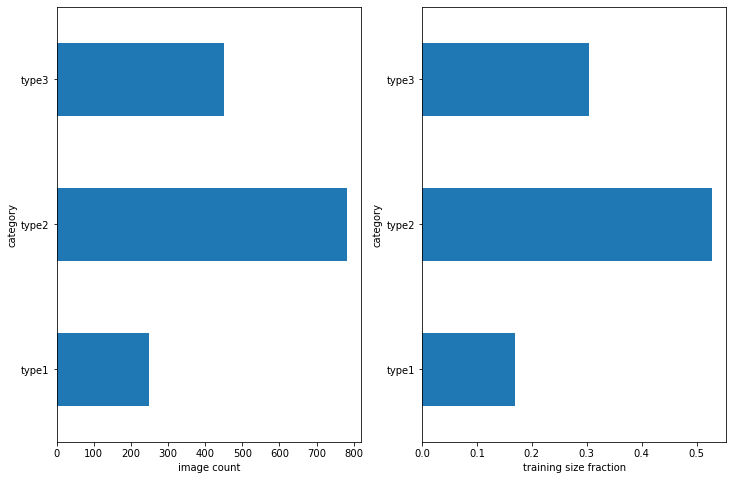

In [14]:
type_group = df.groupby(['category']).agg('count')
type_group_p = type_group.apply(lambda row: 1.0*row['filepath']/df.shape[0], axis=1)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

type_group.plot.barh(ax=axes[0])
axes[0].set_xlabel("image count")
type_group_p.plot.barh(ax=axes[1])
axes[1].set_xlabel("training size fraction")
axes[0].get_legend().remove()

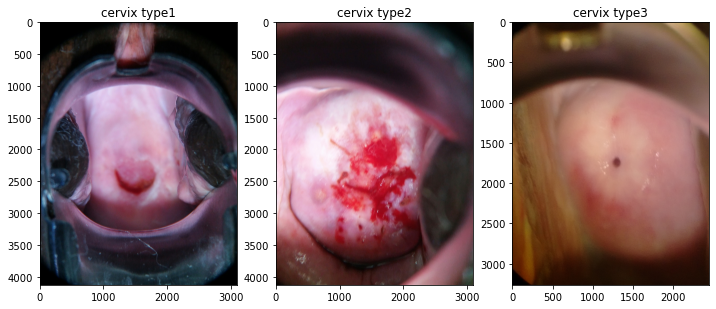

In [15]:
fig = plt.figure(figsize=(12,8))

i = 1
for t in df['category'].unique():
    ax = fig.add_subplot(1,3,i)
    i+=1
    f = df[df['category'] == t]['filepath'].values[0]
    plt.imshow(plt.imread(f))
    plt.title('cervix {}'.format(t))

In [16]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [17]:
from collections import defaultdict

images = defaultdict(list)

for t in df['category'].unique():
    sample_counter = 0
    for _, row in df[df['category'] == t].iterrows():
        
        try:
            img = imread(row.filepath)
            sample_counter +=1
            images[t].append(img)
        except:
            print('image read failed for {}'.format(row.filepath))
        if sample_counter > 35:
            break

C:\Users\yashw\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:819: UserWarning:

Truncated File Read



In [18]:
dfs = []
for t in df['category'].unique():
    t_ = pd.DataFrame(
        {
            'nrows': list(map(lambda i: i.shape[0], images[t])),
            'ncols': list(map(lambda i: i.shape[1], images[t])),
            'nchans': list(map(lambda i: i.shape[2], images[t])),
            'category': t
        }
    )
    dfs.append(t_)

shapes_of_df = pd.concat(dfs, axis=0)
shapes_df_group = shapes_of_df.groupby(by=['nchans', 'ncols', 'nrows', 'category']).size().reset_index().sort_values(['category', 0], ascending=False)
shapes_df_group

,nchans,ncols,nrows,category,0
4,3,2448,3264,type3,26
7,3,3096,4128,type3,8
10,3,3264,2448,type3,2
6,3,3096,4128,type2,23
3,3,2448,3264,type2,13
5,3,3096,4128,type1,24
2,3,2448,3264,type1,6
8,3,3120,4160,type1,3
0,3,480,640,type1,1
1,3,2322,4128,type1,1


In [19]:
df['category'].unique()

array(['type1', 'type2', 'type3'], dtype=object)

In [20]:
len(shapes_of_df)

108

C:\Users\yashw\AppData\Local\Temp/ipykernel_1836/1534026502.py:7: UserWarning:

FixedFormatter should only be used together with FixedLocator



<AxesSubplot:xlabel='size_of_each_type', ylabel='number_of_images'>

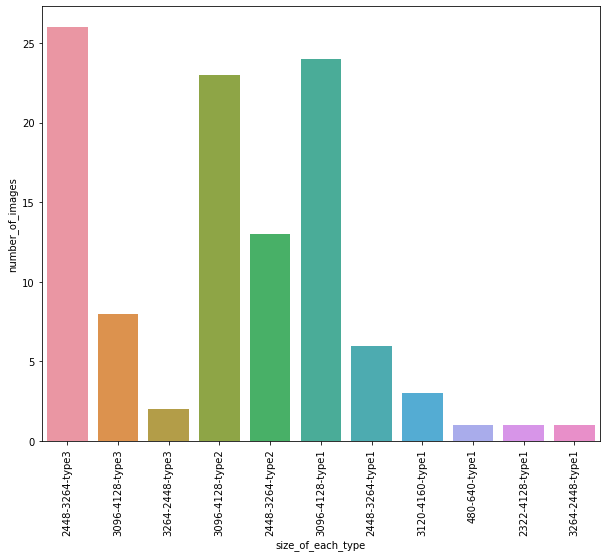

In [21]:
shapes_df_group['size_of_each_type'] = shapes_df_group.apply(lambda row: '{}-{}-{}'.format(row.ncols, row.nrows, row.category), axis=1)
shapes_df_group = shapes_df_group.set_index(shapes_df_group['size_of_each_type'].values)
shapes_df_group['number_of_images'] = shapes_df_group[[0]]

plt.figure(figsize=(10,8))
ax = plt.gca()
ax.set_xticklabels(labels=shapes_df_group['size_of_each_type'],rotation=90);
#shapes_df_grouped['count'].plot.barh(figsize=(10,15))
sns.barplot(x="size_of_each_type", y="number_of_images", data=shapes_df_group)

In [22]:
IMG_DIMS = (224, 224)

def get_img_data_parallel(idx, img, total_imgs):
    if idx % 5000 == 0 or idx == (total_imgs - 1):
        print('{}: working on img num: {}'.format(threading.current_thread().name,
                                                  idx))
    img = cv2.imread(img)
    img = cv2.resize(img, dsize=IMG_DIMS, 
                     interpolation=cv2.INTER_CUBIC)
    img = np.array(img, dtype=np.float32)
    return img

ex = futures.ThreadPoolExecutor(max_workers=None)
train_data_inp = [(idx, img, len(train_files)) for idx, img in enumerate(train_files)]
val_data_inp = [(idx, img, len(val_files)) for idx, img in enumerate(val_files)]
test_data_inp = [(idx, img, len(test_files)) for idx, img in enumerate(test_files)]
test1 = [(idx, img, len(test)) for idx, img in enumerate(test)]
print('Loading Train Images:')
train_data_map = ex.map(get_img_data_parallel, 
                        [i[0] for i in train_data_inp],
                        [i[1] for i in train_data_inp],
                        [i[2] for i in train_data_inp])
train_data = np.array(list(train_data_map))

print('\nLoading Validation Images:')
val_data_map = ex.map(get_img_data_parallel, 
                        [i[0] for i in val_data_inp],
                        [i[1] for i in val_data_inp],
                        [i[2] for i in val_data_inp])
val_data = np.array(list(val_data_map))

print('\nLoading Test_files Images:')
test_data_map = ex.map(get_img_data_parallel, 
                        [i[0] for i in test_data_inp],
                        [i[1] for i in test_data_inp],
                        [i[2] for i in test_data_inp])
test_data = np.array(list(test_data_map))

print('\nLoading Test Images:')
test_data_m = ex.map(get_img_data_parallel, 
                        [i[0] for i in test1],
                        [i[1] for i in test1],
                        [i[2] for i in test1])
test_n = np.array(list(test_data_m))

train_data.shape, val_data.shape, test_data.shape, test_n.shape
# test_data_map.dtype

Loading Train Images:
ThreadPoolExecutor-0_0: working on img num: 0
ThreadPoolExecutor-0_7: working on img num: 946

Loading Validation Images:
ThreadPoolExecutor-0_6: working on img num: 0
ThreadPoolExecutor-0_6: working on img num: 236

Loading Test_files Images:
ThreadPoolExecutor-0_5: working on img num: 0
ThreadPoolExecutor-0_8: working on img num: 296

Loading Test Images:
ThreadPoolExecutor-0_11: working on img num: 0
ThreadPoolExecutor-0_2: working on img num: 511


((947, 224, 224, 3),
 (237, 224, 224, 3),
 (297, 224, 224, 3),
 (512, 224, 224, 3))

In [23]:
len(test_data)

297

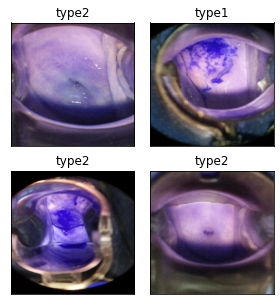

In [24]:
plt.figure(1 , figsize = (5 , 5))
n = 0 
for i in range(4):
    n += 1 
    r = np.random.randint(0 , train_data.shape[0] , 1)
    plt.subplot(2 , 2 , n)
    plt.subplots_adjust(hspace = 0.2 , wspace = 0)
    plt.imshow(train_data[r[0]]/255.)
    plt.title('{}'.format(train_labels[r[0]]))
    plt.xticks([]) , plt.yticks([])

In [25]:
train_imgs_scaled = train_data / 255.
val_imgs_scaled = val_data / 255.
test_imgs_scaled = test_data/255.

le = LabelEncoder()
le.fit(train_labels)
train_labels_enc = le.transform(train_labels)
val_labels_enc = le.transform(val_labels)
test_labels_enc = le.transform(test_labels)

train_labels_1hotenc = to_categorical(train_labels_enc, num_classes=3)
val_labels_1hotenc = to_categorical(val_labels_enc, num_classes=3)
test_labels_1hotenc = to_categorical(test_labels_enc, num_classes=3)

print(train_labels[:6], train_labels_enc[:6])
print(train_labels[:6], train_labels_1hotenc[:6])
print(train_imgs_scaled.shape,val_imgs_scaled.shape,test_imgs_scaled.shape)

['type2' 'type2' 'type1' 'type3' 'type2' 'type1'] [1 1 0 2 1 0]
['type2' 'type2' 'type1' 'type3' 'type2' 'type1'] [[0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]
(947, 224, 224, 3) (237, 224, 224, 3) (297, 224, 224, 3)


In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Activation, Dropout, Flatten, Dense
from keras.applications.resnet import ResNet50

In [27]:
model = Sequential()
model.add(Conv2D(64, (5, 5),strides=2,kernel_initializer='random_normal', input_shape = (224,224,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(128, (5, 5), kernel_initializer='random_normal'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(512, (5, 5),strides=2, kernel_initializer='random_normal'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, kernel_initializer='random_normal'))
model.add(Activation('relu'))
model.add(Dense(128, kernel_initializer='random_normal'))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(3, kernel_initializer='random_normal'))
model.add(Activation('softmax'))


In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 110, 110, 64)      4864      
                                                                 
 activation (Activation)     (None, 110, 110, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 55, 55, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 51, 51, 128)       204928    
                                                                 
 activation_1 (Activation)   (None, 51, 51, 128)       0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 128)      0         
 2D)                                                    

In [29]:
adam = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [30]:

len(train_imgs_scaled)

947

In [31]:
len(train_labels_1hotenc)

947

In [32]:
len(val_imgs_scaled)

237

In [33]:
len(val_labels_1hotenc)

237

In [34]:

history = model.fit(train_imgs_scaled,train_labels_1hotenc,validation_data=(val_imgs_scaled,val_labels_1hotenc),batch_size=74,shuffle=True, epochs=20,verbose=1)

Epoch 1/20
13/13 [==============================] - 60s 4s/step - loss: 1.2971 - accuracy: 0.4974 - val_loss: 1.0131 - val_accuracy: 0.4852
Epoch 2/20
13/13 [==============================] - 56s 4s/step - loss: 0.9970 - accuracy: 0.5333 - val_loss: 1.0079 - val_accuracy: 0.5063
Epoch 3/20
13/13 [==============================] - 54s 4s/step - loss: 0.9815 - accuracy: 0.5385 - val_loss: 0.9934 - val_accuracy: 0.5063
Epoch 4/20
13/13 [==============================] - 54s 4s/step - loss: 0.9703 - accuracy: 0.5407 - val_loss: 0.9835 - val_accuracy: 0.5105
Epoch 5/20
13/13 [==============================] - 55s 4s/step - loss: 0.9693 - accuracy: 0.5343 - val_loss: 1.0084 - val_accuracy: 0.5063
Epoch 6/20
13/13 [==============================] - 56s 4s/step - loss: 0.9590 - accuracy: 0.5354 - val_loss: 0.9807 - val_accuracy: 0.5105
Epoch 7/20
13/13 [==============================] - 54s 4s/step - loss: 0.9338 - accuracy: 0.5565 - val_loss: 0.9914 - val_accuracy: 0.4979
Epoch 8/20
13/13 [==

In [ ]:
# print(history.history.keys())


# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'validation'], loc='upper left')
# plt.show()

# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'validation'], loc='upper left')
# plt.show()

In [35]:
vgg = tf.keras.applications.vgg19.VGG19(include_top=False, weights='imagenet', 
                                        input_shape=(224,224,3))
vgg.trainable = False
# Freeze the layers
for layer in vgg.layers:
    layer.trainable = False
    
base_model = vgg
base_output = base_model.output
pool_output = tf.keras.layers.Flatten()(base_output)
hidden_layer1 = tf.keras.layers.Dense(512, activation='relu')(pool_output)
dropout1 = tf.keras.layers.Dropout(rate=0.2)(hidden_layer1)

output = tf.keras.layers.Dense(3, activation='softmax')(dropout1)

model = tf.keras.Model(inputs=base_model.input, outputs=output)
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.01),
                loss='categorical_crossentropy',
                metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

C:\Users\yashw\anaconda3\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



In [ ]:

history = model.fit(train_imgs_scaled,train_labels_1hotenc,validation_data=(val_imgs_scaled,val_labels_1hotenc),batch_size=74,shuffle=True, epochs=40,verbose=1)

Epoch 1/40
13/13 [==============================] - 313s 24s/step - loss: 265.4796 - accuracy: 0.4097 - val_loss: 45.9030 - val_accuracy: 0.5063
Epoch 2/40
13/13 [==============================] - 314s 25s/step - loss: 59.1561 - accuracy: 0.3801 - val_loss: 23.9618 - val_accuracy: 0.3207
Epoch 3/40
13/13 [==============================] - 321s 25s/step - loss: 19.3991 - accuracy: 0.4340 - val_loss: 16.9111 - val_accuracy: 0.5063
Epoch 4/40
13/13 [==============================] - 333s 26s/step - loss: 7.5968 - accuracy: 0.4277 - val_loss: 12.0062 - val_accuracy: 0.5063
Epoch 5/40
13/13 [==============================] - 321s 25s/step - loss: 1.9748 - accuracy: 0.5808 - val_loss: 1.2674 - val_accuracy: 0.5148
Epoch 6/40
13/13 [==============================] - 334s 26s/step - loss: 1.1640 - accuracy: 0.5375 - val_loss: 3.6952 - val_accuracy: 0.1730
Epoch 7/40
13/13 [==============================] - 326s 25s/step - loss: 1.6258 - accuracy: 0.5026 - val_loss: 1.0161 - val_accuracy: 0.493

In [ ]:
print(history.history.keys())


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
model.evaluate(val_imgs_scaled,val_labels_1hotenc,verbose=1)

In [ ]:
pred=model.predict(test_imgs_scaled)
# test_data.shape

In [ ]:
pred[1]


In [ ]:
test_labels_1hotenc[1]

In [ ]:
pred1 = model.predict(test_n)

In [ ]:
pred1

In [ ]:
len(test_n)

In [ ]:
df2 = pd.DataFrame(pred1,columns=['Type_1','Type_2','Type_3'])
df2['image_name']=test

df2.head()

In [ ]:
cols = list(df2.columns)
cols = [cols[-1]] + cols[:-1]
df2 = df2[cols]

In [ ]:
df2.reset_index(drop=True)

In [ ]:
df2.to_csv('submission1.csv',index=False)

In [ ]:
from keras.applications.resnet import ResNet50

In [ ]:
# initialising the resnet50 pretrained model with image net weights
base_model = ResNet50(weights='imagenet', 
                       include_top=False, 
                       input_shape=(224, 224, 3)) 

In [ ]:
from keras.models import Model, Sequential

In [ ]:
# classifier network for classification of cervix types
flatt = tf.keras.layers.Flatten()(base_model.output)

  
f1 = tf.keras.layers.Dense(128, activation='relu', name="Dense1")(flatt)

   
f2 = tf.keras.layers.Dense(3, activation='softmax', name="Dense2")(f1)

model = tf.keras.models.Model(inputs=base_model.input, outputs=f2)

In [ ]:
# Initialising the optimizer
adam = tf.keras.optimizers.Adam(learning_rate=0.01)

In [ ]:
# compiling the model before fitting the model
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [ ]:
# visualizing the model architecture using summary function
model.summary()

In [ ]:
# fitting the model with both train and validation data and storing the history of the running model in a variable history.

In [ ]:

history = model.fit(train_imgs_scaled,train_labels_1hotenc,validation_data=(val_imgs_scaled,val_labels_1hotenc),batch_size=71,epochs = 20,verbose=1)

In [ ]:
# plotting the accuracy and loss graph for the model
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
t = f.suptitle('Deep Neural Net Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epochs = list(range(1,EPOCHS+1))
ax1.plot(epochs, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(epochs)
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epochs, history.history['loss'], label='Train Loss')
ax2.plot(epochs, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(epochs)
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")


In [ ]:
# predicting the model with test images from train data
predictions = model.predict(test_n)

In [ ]:
# printing the predictions

In [ ]:
predictions

In [ ]:
# creating the dataframe for test predictions
df2 = pd.DataFrame(pred1,columns=['Type_1','Type_2','Type_3'])
df2['image_name']=test

df2.head()

In [ ]:
# changing the last column of dataframe into first column
cols = list(df2.columns)
cols = [cols[-1]] + cols[:-1]
df2 = df2[cols]

In [ ]:
# resetting the index in dataframe
df2.reset_index(drop=True)

In [ ]:
# printing the first values of the dataframe
df2.head()